In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [171]:
df = pd.read_csv("../datasets/day.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [195]:
df_h.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [173]:
# df.drop(columns="season", inplace=True)

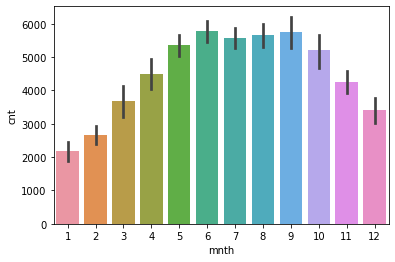

In [174]:
sns.barplot(data=df, x = "mnth", y="cnt")

In [175]:
def x(r):
  if r in [1, 2, 12]:
    return "1"
  elif r in [3, 4, 5]:
    return "2"
  elif r in [6, 7, 8]:
    return "3"
  else:
    return "4"

In [176]:
df["season"] = df["mnth"].apply(x)

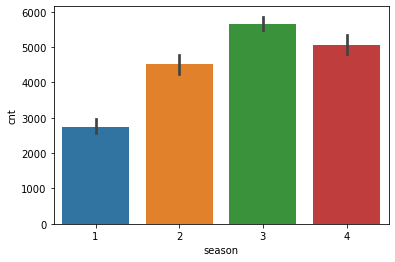

In [177]:
sns.barplot(data=df, x = "season", y="cnt")

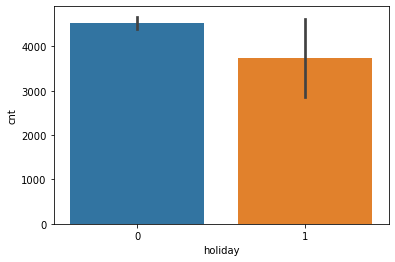

In [178]:
sns.barplot(data=df, x = "holiday", y="cnt")

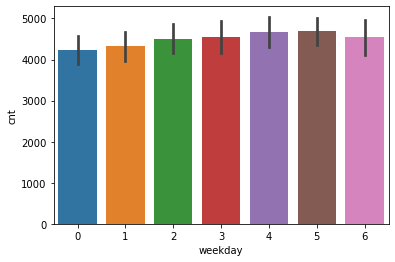

In [179]:
sns.barplot(data=df, x = "weekday", y="cnt")

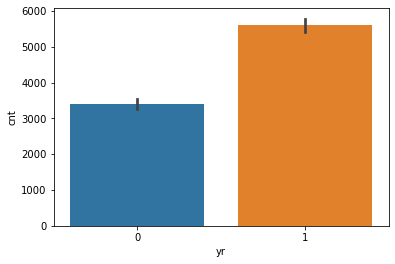

In [180]:
sns.barplot(data=df, x = "yr", y="cnt")

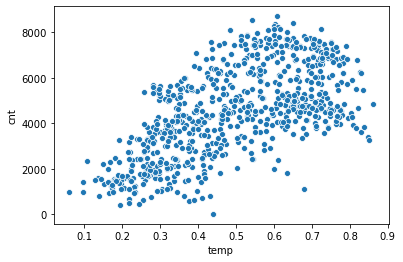

In [181]:
sns.scatterplot(data=df, x = "temp", y="cnt")

In [182]:
df_h = pd.read_csv("../datasets/hour.csv")
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


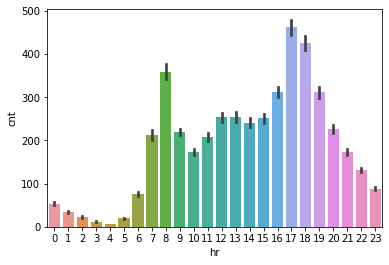

In [183]:
sns.barplot(data=df_h, x = "hr", y="cnt")

In [194]:
df_h["cnt"].sum()/df.shape[0]

4504.3488372093025

In [184]:
reg = LogisticRegression()

In [185]:
df_no_date = df_h.drop(columns=["dteday"])

In [186]:
predictors = df_no_date.columns[df_no_date.columns != "cnt"]
X = df_no_date[predictors].values
y = df_no_date['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
knn = KNeighborsRegressor() 
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


MSE:

In [187]:
((predictions - y_test)**2).mean()

288.0308784042961

In [188]:
def get_best(ks, rmse):
    min_rmse = min(rmse)
    return ks[rmse.index(min_rmse)], min_rmse

In [189]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [190]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_train)
    rmse_tr = rmse(predictions, y_train)
    predictions = regr.predict(X_test)
    rmse_te = rmse(predictions, y_test)
    return rmse_tr, rmse_te

In [191]:
n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsRegressor(n_neighbors=k, algorithm='brute', p=1)
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')
best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done
best k = 3, best test RMSE: 16.9


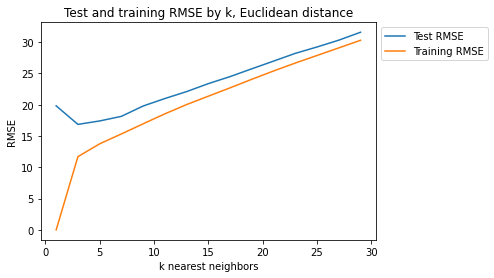

In [192]:
plt.plot(ks, test_rmse, label = "Test RMSE")
plt.plot(ks, train_rmse, label = "Training RMSE")
plt.xlabel("k nearest neighbors")
plt.title("Test and training RMSE by k, Euclidean distance")
plt.ylabel("RMSE")
plt.legend(bbox_to_anchor=(1, 1))